## Setup

Decoder is the black-box fuzzer we propose in the paper.
Decoder code repository is located in folder chains/src/bfuzzer. While pfuzzer code is located at chains/src/pfuzzer.

In [48]:
ls chains/src 

bfuzzer/  LICENSE  pfuzzer/  programs/  README.md


We have used five target programs for our experiments. The programs are input parsers written in C language. These parsers parse the following languages:

- cJSON: Ultralightweight JSON.
- CSV: For tabular data.
- INI: Used for configuration files comprising of key–value pairs.
- Tiny-C: Stripped down version of C.
- mJS: A strict subset of JavaScript.

The source code of some subjects has been slightly modified, namely cjson and tinyc, to include a Trie. Therefore Decoder uses one version and pfuzzer uses another version of the same subject set.  

The source code files of the five subjects for Decoder are stored in chains/src/bfuzzer/examples 

The source code files of the five subjects for pfuzzer are stored in chains/src/pfuzzer/samples

The following displays the source files of cjson for Decoder:

In [49]:
ls chains/src/bfuzzer/examples/cjson

cJSON.c*    cjson.py*               eval-cjson.py*  Makefile*
cjson.cov*  coverage.cJSON.c.html   execution_time  times.txt*
cJSON.gcda  coverage.html           input           tokens.h*
cJSON.gcno  coverage.tokens.h.html  inputs.json
cJSON.h*    coverage.txt            inputs.txt*


The source code file is named cJSON.c and the trie file is tokens.h

Before starting experiments, we need to delete the evlaution files of any previous run.

In [50]:
!rm chains/src/bfuzzer/examples/cjson/coverage*
!rm chains/src/bfuzzer/examples/csv/coverage*
!rm chains/src/bfuzzer/examples/ini/coverage*
!rm chains/src/bfuzzer/examples/mjs/coverage*
!rm chains/src/bfuzzer/examples/tiny/coverage*
!rm chains/src/pfuzzer/samples/cjson/*.html
!rm chains/src/pfuzzer/samples/csv/*.html
!rm chains/src/pfuzzer/samples/ini/*.html
!rm chains/src/pfuzzer/samples/mjs/*.html
!rm chains/src/pfuzzer/samples/tinyc/*.html

!rm -r results/bfuzzer/*
!rm -r results/pfuzzer/*

To produce the evaluation graphs, we need to install some packages: setuptools and plotnine.

In [51]:
#!pip3 install --upgrade setuptools
#!pip3 install plotnine

## Fuzzing experiment

We run each of the two fuzzer for a period of 1 hour to generate inputs. Afterwards, the code coverage evaluation is run to extract the code coverage. The code coverage evaluation starts automatically after the 1 hour fuzzing run.

We runs the experiment only once. So we set the number of runs to 1:

In [52]:
!RUNS=1

### Running Decoder

To run Decoder on all five subjects, we execute the following make command.

In [53]:
!make runs_bfuzzer R=1

for run in {1..1}; do \
	make run_bfuzzer ; \
	mkdir results/bfuzzer/run_$run ; \
	cp -a chains/src/bfuzzer/examples/. results/bfuzzer/run_$run/ ; \
	echo -e "\n- bFuzzer run" $run "completed -\n" ; \
done
make[1]: Entering directory '/home/vagrant'
sh run_bfuzzer.sh
make[2]: Entering directory '/home/vagrant/chains/src/bfuzzer'
make compile
make[3]: Entering directory '/home/vagrant/chains/src/bfuzzer'
for i in examples/cjson/ examples/csv/ examples/ini/ examples/mjs/ examples/tiny/; do (cd $i; make); done
make[4]: Entering directory '/home/vagrant/chains/src/bfuzzer/examples/cjson'
gcc -g -o cjson cJSON.c > /dev/null 2>&1
gcc -fprofile-arcs -ftest-coverage -g -o cjson.cov cJSON.c > /dev/null 2>&1
make[4]: Leaving directory '/home/vagrant/chains/src/bfuzzer/examples/cjson'
make[4]: Entering directory '/home/vagrant/chains/src/bfuzzer/examples/csv'
gcc -g -o csvparser csvparser.c
gcc -fprofile-arcs -ftest-coverage -g -o csvparser.cov csvparser.c
make[4]: Leaving directory '/home/vagran

At this point, Decoder has generated valid inputs for each subject. The inputs are stored in text files "inputs.txt". Let's check out some of generated cjson inputs.

In [54]:
!head chains/src/bfuzzer/examples/cjson/inputs.txt

'\x0c["^",84.\r\r \x0b\x0c\r\n\x0b\r\x0c\x0c\x0c\x0c\n\r\r\x0c\x0b\x0b\x0b\t,892\t\n\n\r]'
' \x0b\x0b4'
'true'
'3P'
'{\t\x0b\t\r }'
'0V'
'true'
"9'QFI"
'[7]'
'1oH'


Now, we run the evaluation of Decoder to obtain the code coverage results.

### Running Pfuzzer

In [55]:
!make runs_pfuzzer R=1

sudo -- sh -c 'echo core >/proc/sys/kernel/core_pattern'
for run in {1..1}; do \
	cd chains/src/pfuzzer/samples/ && sh run_all.sh 1 ; \
	cd /home/vagrant ; \
	mkdir results/pfuzzer/run_$run ; \
	cp -a chains/src/pfuzzer/samples/. results/pfuzzer/run_$run/ ; \
	echo -e "\n- pFuzzer run" $run "completed -\n" ; \
done
Time: 1h

- pFuzzer run 1 completed -



In [56]:
ls chains/src/pfuzzer/samples/cjson

cJSON.c                  cJSON.c.uninstrumented.bc  get_cov.sh
cJSON.c.cov*             cJSON.gcda                 log.txt
cJSON.c.debug.bc         cJSON.gcno                 metadata
cJSON.c.gcov             cJSON.h                    output.gz
cJSON.c.instrumented*    clean.sh                   pyg.txt
cJSON.c.opt_debug.bc     coverage.cJSON.c.html      run_exp.sh
cJSON.c.orig*            coverage.html              stats.txt
cJSON.c.uninstrumented*  crashes.txt                valid_inputs.txt


In [57]:
!head chains/src/pfuzzer/samples/cjson/valid_inputs.txt

Time used until input was generated: 13.270501
'0'

Time used until input was generated: 16.053170
'1'

Time used until input was generated: 24.798907
'4'

Time used until input was generated: 27.470645


## Code coverage graphs

We run a python script "runs_stats.py" to generate csv files that contain the results of the previous runs. The script generates two csv files bfuzzer_runs.csv and pfuzzer_runs.csv
The columns of each csv file are:
run, program, input, input lengh, branch coverage,statement coverage, generation time

In [58]:
!rm results/pfuzzer_runs.csv
!rm results/bfuzzer_runs.csv

In [59]:
!cd results && python3 runs_stats.py 1

rm: cannot remove 'cJSON.c.orig': No such file or directory
cJSON.c: In function ‘main’:
cJSON.c:2953:5: warning: format not a string literal and no format arguments [-Wformat-security]
     printf(string);
     ^~~~~~
rm: cannot remove 'csvparser.c.orig': No such file or directory
csvparser.c: In function ‘main’:
csvparser.c:253:5: warning: format not a string literal and no format arguments [-Wformat-security]
     printf(string);
     ^~~~~~
rm: cannot remove 'ini.c.orig': No such file or directory
ini.c: In function ‘main’:
ini.c:302:5: warning: format not a string literal and no format arguments [-Wformat-security]
     printf(string);
     ^~~~~~
rm: cannot remove 'mjs.c.orig': No such file or directory
rm: cannot remove 'tiny.c.orig': No such file or directory
Done!


In [60]:
!cd results && (cat HEADERS.txt; (cat pfuzzer_runs.csv | sed -e 's#^#pfuzzer,#g'; cat bfuzzer_runs.csv | sed -e 's#^#bfuzzer,#g') | sed -e 's# ##g') > data.csv

In [61]:
import plotnine as p9
import pandas as pd
import matplotlib.pyplot as plt
import sys
from matplotlib import gridspec
        #'pfuzzer': 'orange',
        #'bfuzzer': 'violet'
color_dict = {
        'pFuzzer': 'orange',
        'DECODER': 'violet'
        }

def plot(inpfile, prog):
    df = pd.read_csv(inpfile)
    df = df.loc[(df.run==1) & (df.program == prog)]
    df.fuzzer.replace('bfuzzer', 'DECODER', inplace=True)
    df.fuzzer.replace('pfuzzer', 'pFuzzer', inplace=True)

    #.fuzzer.replace('pfuzzer', 'pFuzzer')

    plot = (p9.ggplot(data=df, mapping=p9.aes(x='time', y='branch', color='fuzzer')) +
        p9.theme_classic() +
        p9.theme(
            figure_size=(4, 4),
            legend_title=p9.element_blank(),
            #legend_position=(0.8,0),
            legend_position=(0.8,0.7),
            legend_direction='vertical') +
        p9.labs(title='Coverage of ' + prog, y='Branch Coverage (%)', x = 'Time (Seconds)') +
        #p9.scale_fill_manual(values=color_dict) +
        p9.scale_color_manual(values=color_dict) +
        #p9.geom_point(size=0.1) +
        #p9.theme(text=p9.element_text(size=16))  +
        p9.geom_line() 
        #p9.facet_grid(facets="time~branch")
        )
    print(plot)
    #plot.save(filename="results/plot_" + prog + ".png", dpi=60, height=4, width=6, units='in') # height, width units='mm'

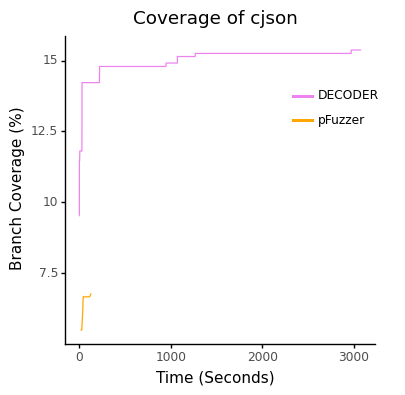

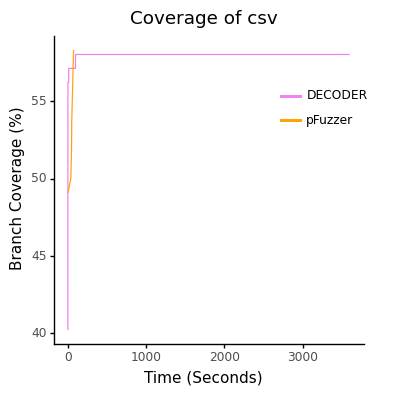

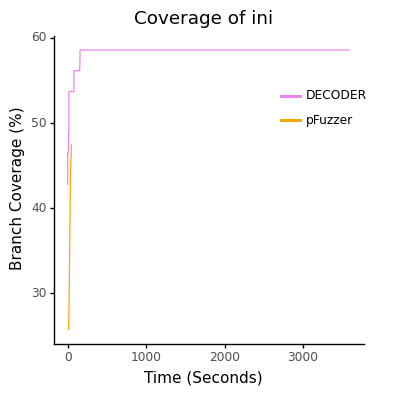

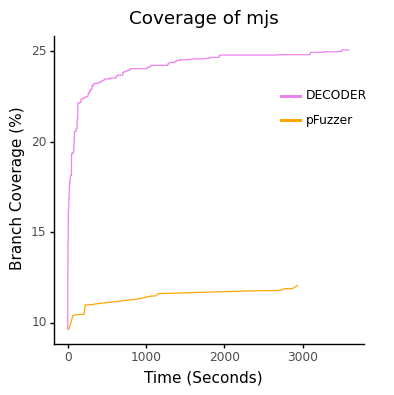

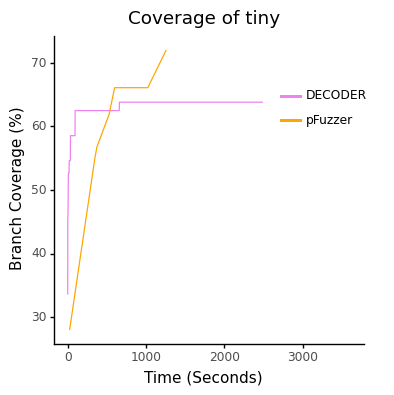

In [62]:
plot("results/data.csv", "cjson")
plot("results/data.csv", "csv")
plot("results/data.csv", "ini")
plot("results/data.csv", "mjs")
plot("results/data.csv", "tiny")